# Mplchart Tests

In [122]:
import yfinance as yf

from mplchart.chart import Chart
from mplchart.primitives import Candlesticks, Volume, Peaks, Price
from mplchart.indicators import SMA, EMA, WMA, HMA, ROC, RSI, MACD, DMI, STOCH, TSF, ALMA, BBANDS, KELTNER, CCI


In [133]:
ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="5y")
prices = prices.rename(columns=str.lower).rename_axis(index=str.lower)
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-01-10 00:00:00-05:00 to 2025-01-10 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   open          1258 non-null   float64
 1   high          1258 non-null   float64
 2   low           1258 non-null   float64
 3   close         1258 non-null   float64
 4   volume        1258 non-null   int64  
 5   dividends     1258 non-null   float64
 6   stock splits  1258 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.6 KB


In [124]:
prices.rename(columns=str.lower)[["high", "low", "close"]].mean(axis=1)



date
2020-01-10 00:00:00-05:00     75.235868
2020-01-13 00:00:00-05:00     76.361275
2020-01-14 00:00:00-05:00     76.138318
2020-01-15 00:00:00-05:00     75.651151
2020-01-16 00:00:00-05:00     76.187607
                                ...    
2025-01-03 00:00:00-05:00    243.143331
2025-01-06 00:00:00-05:00    245.176666
2025-01-07 00:00:00-05:00    243.036672
2025-01-08 00:00:00-05:00    242.153336
2025-01-10 00:00:00-05:00    239.651662
Length: 1258, dtype: float64

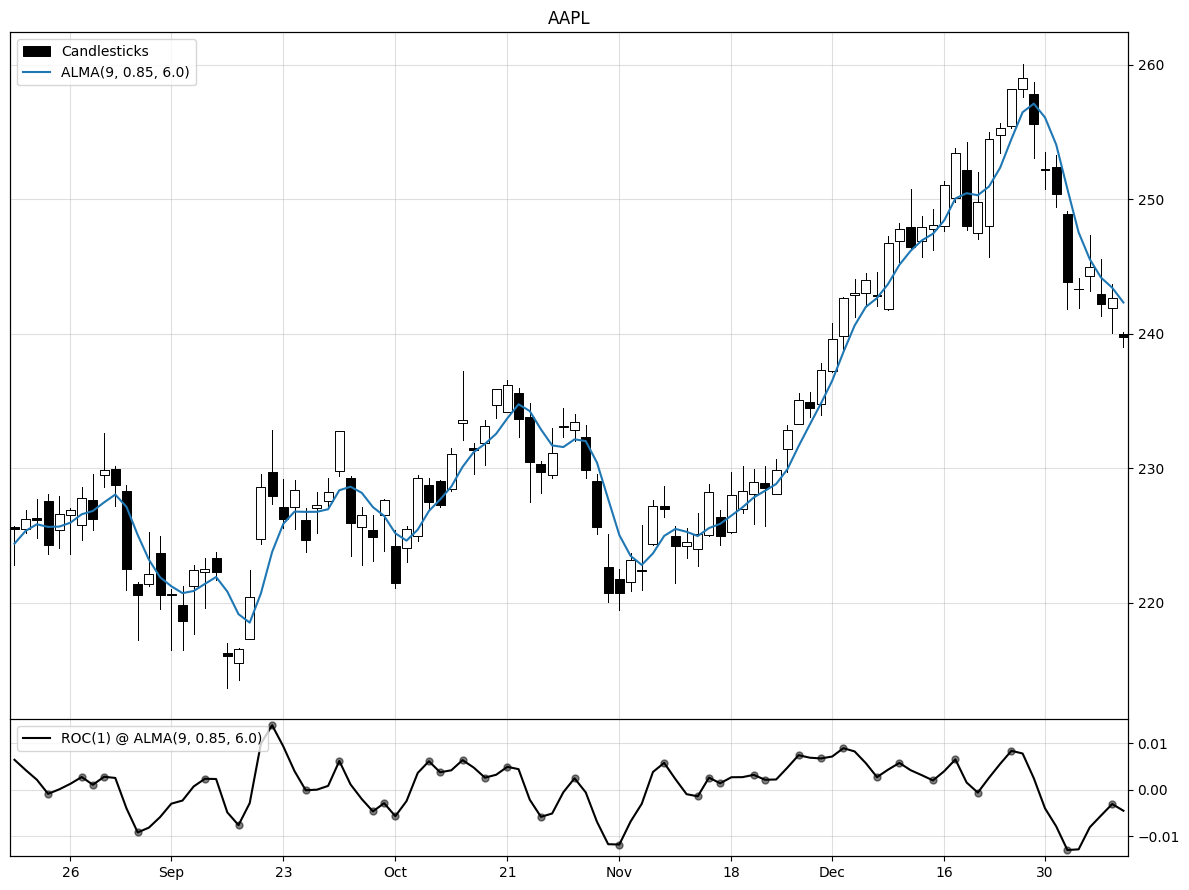

In [125]:


max_bars = 100

indicators = [
    Candlesticks(),
    ALMA(),
    ROC(1) @ ALMA(),
    Peaks(1)
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)

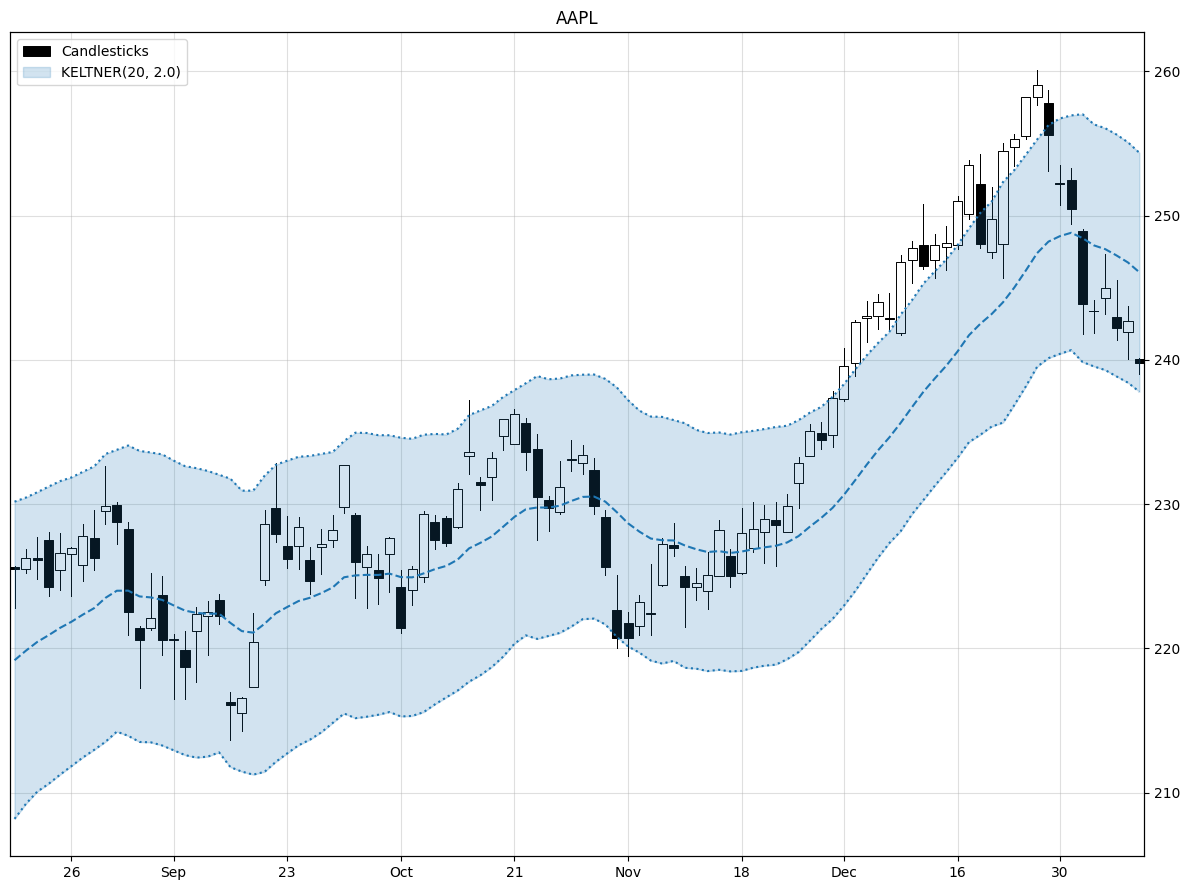

In [126]:
max_bars = 100

indicators = [
    Candlesticks(),
    KELTNER()
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)

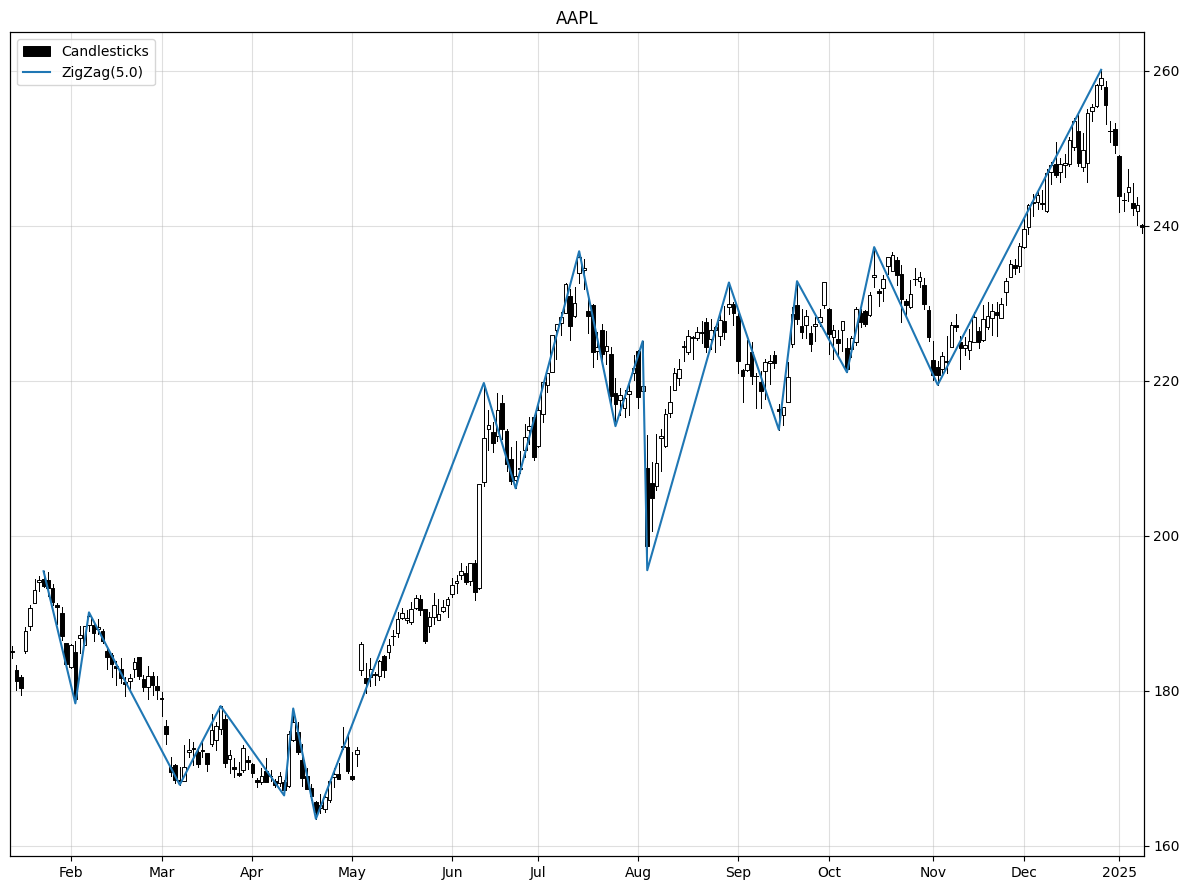

In [127]:
from mplchart.primitives import ZigZag

max_bars = 250

indicators = [
    Candlesticks(),
    ZigZag()
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)

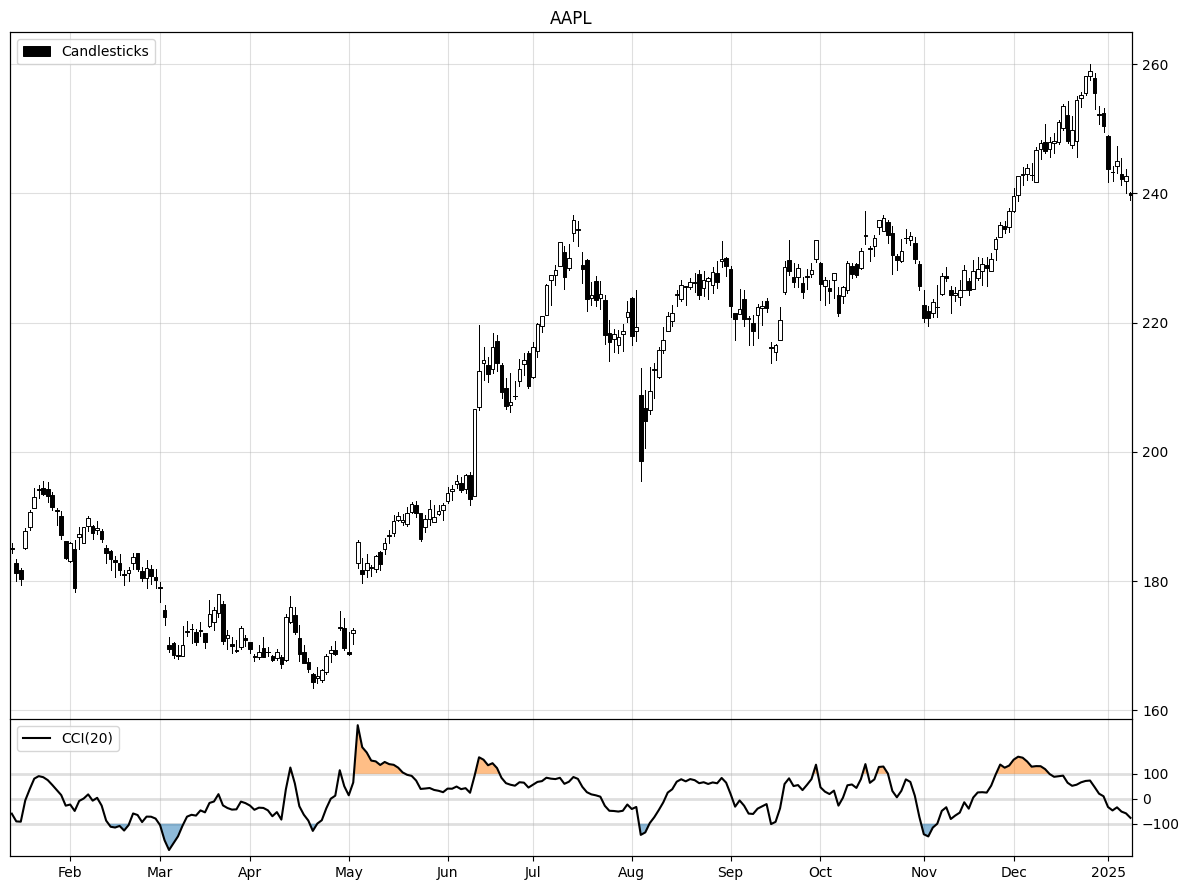

In [128]:
from mplchart.indicators import CCI, ATR

max_bars = 250

indicators = [
    Candlesticks(),
    CCI()
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)

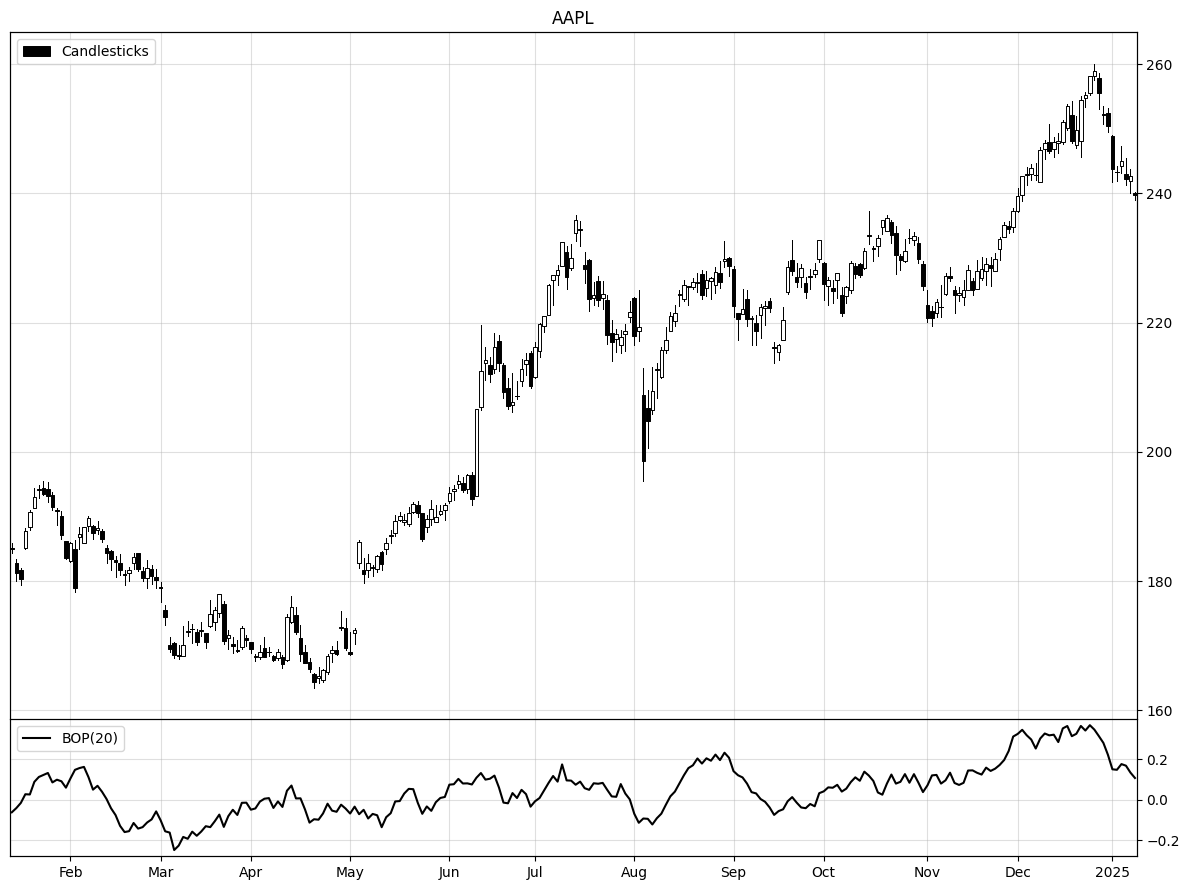

In [129]:
from mplchart.indicators import BOP

max_bars = 250

indicators = [
    Candlesticks(),
    BOP()
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)

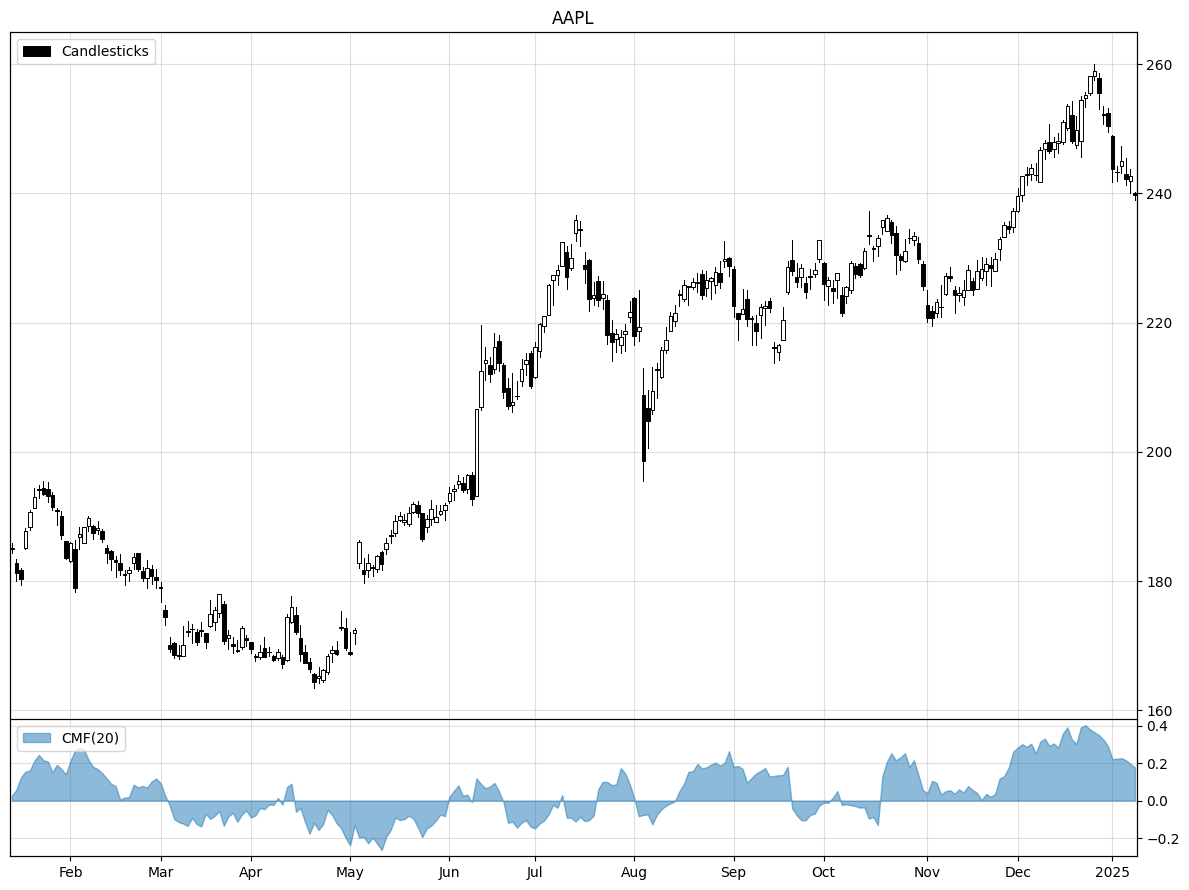

In [130]:
from mplchart.indicators import CMF

max_bars = 250

indicators = [
    Candlesticks(),
    CMF()
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)

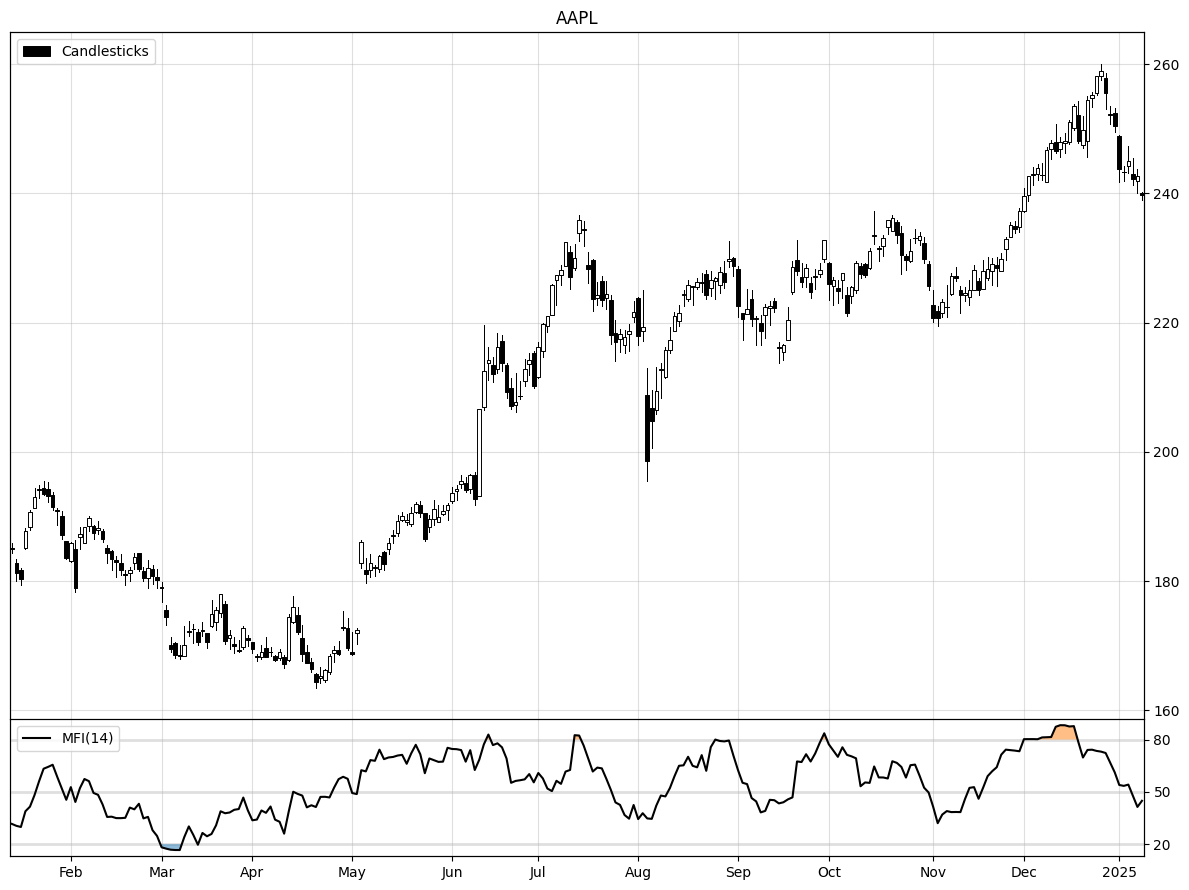

In [132]:
from mplchart.indicators import MFI

max_bars = 250

indicators = [
    Candlesticks(),
    MFI()
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)